In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
import matplotlib as mpl

In [3]:
warnings.simplefilter('ignore')

In [80]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/X_new.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/y.pkl.gz', 'rb'))

In [5]:
import  subprocess
import sys
import os
from N_PLS1_help_scripts.CenteringClass import centrir
from N_PLS1_help_scripts.N_PLS1_algorithm import Tri_PLS1_grid

In [81]:
cen=centrir(testSize=0.1428,column_y=0)

In [82]:
result=cen.centering_and_cv(Xdata_numpy['X'],Ydata)

In [83]:
y_train=result.y_train
y_test=result.y_test
X_train=result.X_train
X_test=result.X_test

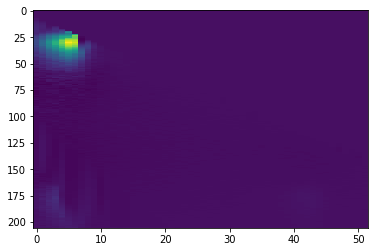

In [84]:
plt.imshow(X_train[12,:,:],aspect='auto')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

Чтобы подтянуть Решётчатый поиск для оптимизации сразу двух параметров, нужно его немного расширить

In [12]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_squared_error
import itertools as it

In [23]:
aa=list(it.product([1,2,3],['a','s'],repeat=1))

In [26]:
aa

[(1, 'a'), (1, 's'), (2, 'a'), (2, 's'), (3, 'a'), (3, 's')]

In [27]:
aa.index((1, 'a'))

0

In [20]:
for i,j in a:
    print(i)

1
1
2
2
3
3


In [75]:
class myGridsearch(RegressorMixin,BaseEstimator):
    def __init__(self,b_koef,n_components,cv=5):
        self.b_koef=b_koef
        self.n_components=n_components
        self.cv=cv
        
    def fit(self,x,y,X_test, y_test):
        resoult=np.zeros([len(self.b_koef),self.n_components])
        for i in list(self.b_koef):
            npls1=Tri_PLS1_grid()
            scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
            parametrsNames={'n_components': range(1,self.n_components+1),
                            'a': [np.power(10, i, dtype = np.float)]}
            gridCought=GridSearchCV(npls1, parametrsNames, cv=self.cv, scoring=scoring,refit='r2', return_train_score=True)
            gridCought.fit(x.copy(), y.copy())
            r2_p=gridCought.score(X_test.copy(), y_test.copy())
            r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
            if ((r2_p<=0) or (max(r2_cv)<=0)):
                resoult[self.b_koef.index(i),:]=np.zeros([self.n_components])
            else:
                resoult[self.b_koef.index(i),:]=r2_cv
        self.resoult=resoult
        return self

In [51]:
list(it.product(range(1,7),['a','s'],repeat=1))

[(1, 'a'),
 (1, 's'),
 (2, 'a'),
 (2, 's'),
 (3, 'a'),
 (3, 's'),
 (4, 'a'),
 (4, 's'),
 (5, 'a'),
 (5, 's'),
 (6, 'a'),
 (6, 's')]

In [22]:
a

In [32]:
aa=np.zeros([4,8])

In [33]:
aa[3,1]+=5

In [34]:
aa

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y_train=result.y_train
y_test=result.y_test
X_train=result.X_train
X_test=result.X_test

In [85]:
model=myGridsearch(b_koef=range(-25,6,1),n_components=4)

In [86]:
t=model.fit(X_train,y_train,X_test,y_test)

In [87]:
t.resoult

array([[  0.05211365,   0.37504142,   0.73228115,   0.55980791],
       [  0.0521059 ,   0.37474405,   0.73226475,   0.55685235],
       [  0.05202714,   0.37169631,   0.73210082,   0.5117876 ],
       [  0.05111245,   0.33250118,   0.7306593 , -33.40077584],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [67]:
t.resoult

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.3333315 , 0.44038711, 0.        ],
       [0.        , 0.38904404, 0.63213439, 0.        ],
       [0.        , 0.39214903, 0.62977263, 0.        ],
       [0.        , 0.39179528, 0.62952108, 0.        ],
       [0.        , 0.39174616, 0.62954788, 0.        ],
       [0.        , 0.3917476 , 0.62954436, 0.        ],
       [0.        , 0.39174746, 0.62954509, 0.        ],
       [0.        , 0.39174738, 0.62954502, 0.        ],
       [0.        , 0.391747  , 0.62954499, 0.        ],
       [0.        , 0.39174319, 0.62954464, 0.        ],
       [0.        , 0.39170509, 0.6295411 , 0.        ],
       [0.        , 0.39132215, 0.62950591, 0.        ],
       [0.        , 0.38730164, 0.62917619, 0.        ],
       [0.        , 0.32272209, 0.62892222, 0.        ],
       [0.        , 0.        ,

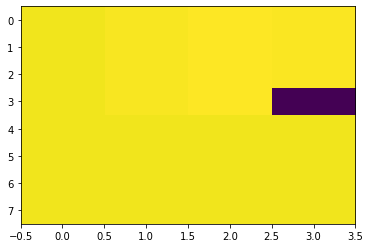

In [88]:
plt.imshow(t.resoult, aspect="auto")
plt.show();